In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("diwali-sales-data.csv", encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# drop columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
# rename column
df.rename(columns = {'Marital_Status': 'Married'}, inplace=True)

In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


--> Exploratory Data Analysis (EDA)

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

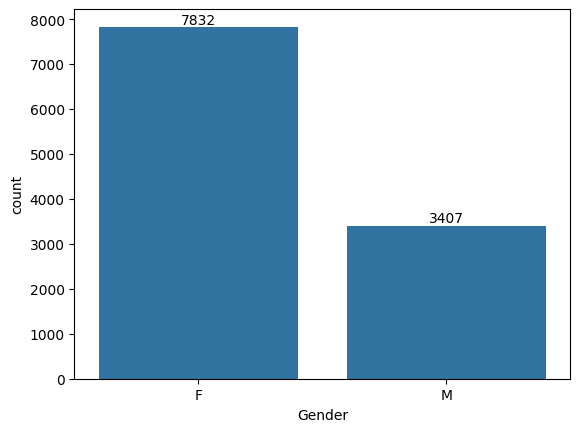

In [15]:
ax = sns.countplot(x='Gender', data=df)

# showing values as label in chart
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

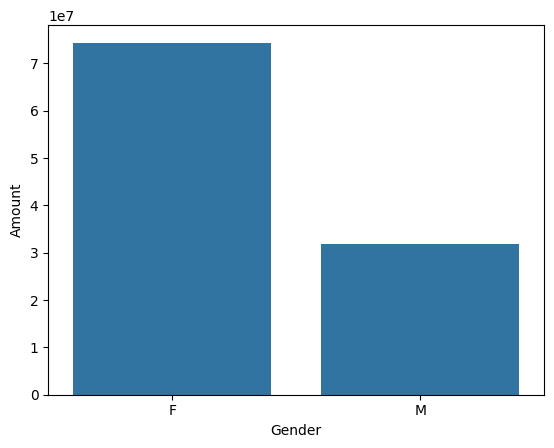

In [16]:
sales_by_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', data=sales_by_gender)

* From above graphs we can see that most of the buyers are females and even purchasing power of females are greater than males

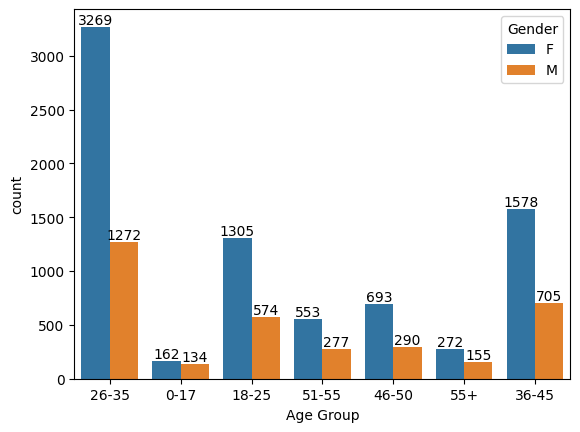

In [17]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

# showing values as label in chart
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

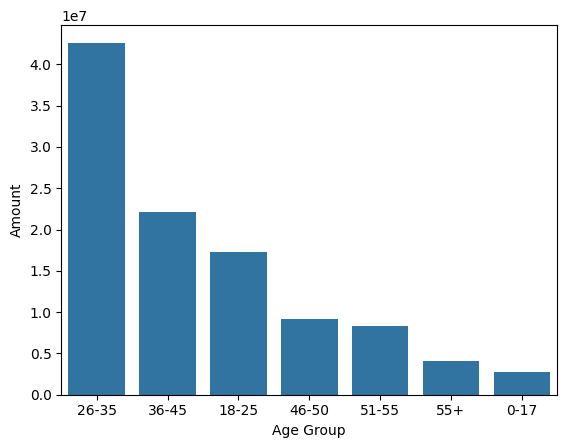

In [18]:
sales_by_age_group = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_by_age_group)

* From above graphs we can see that most buyers are females between the age of 26 to 45

<Axes: xlabel='State', ylabel='Orders'>

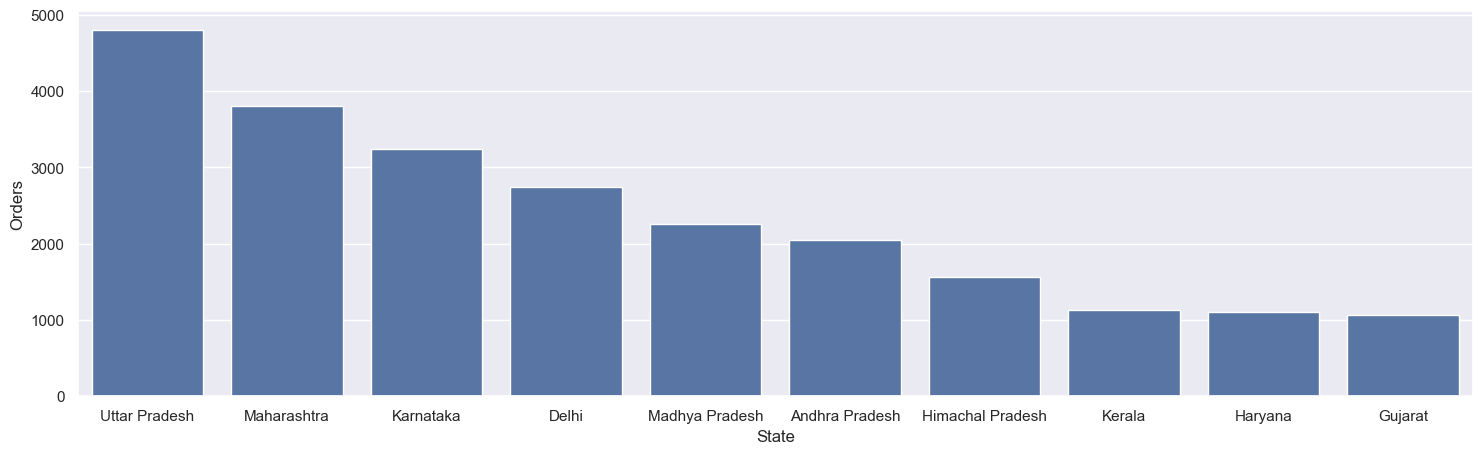

In [19]:
sales_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (18,5)})
sns.barplot(data=sales_by_state, x='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

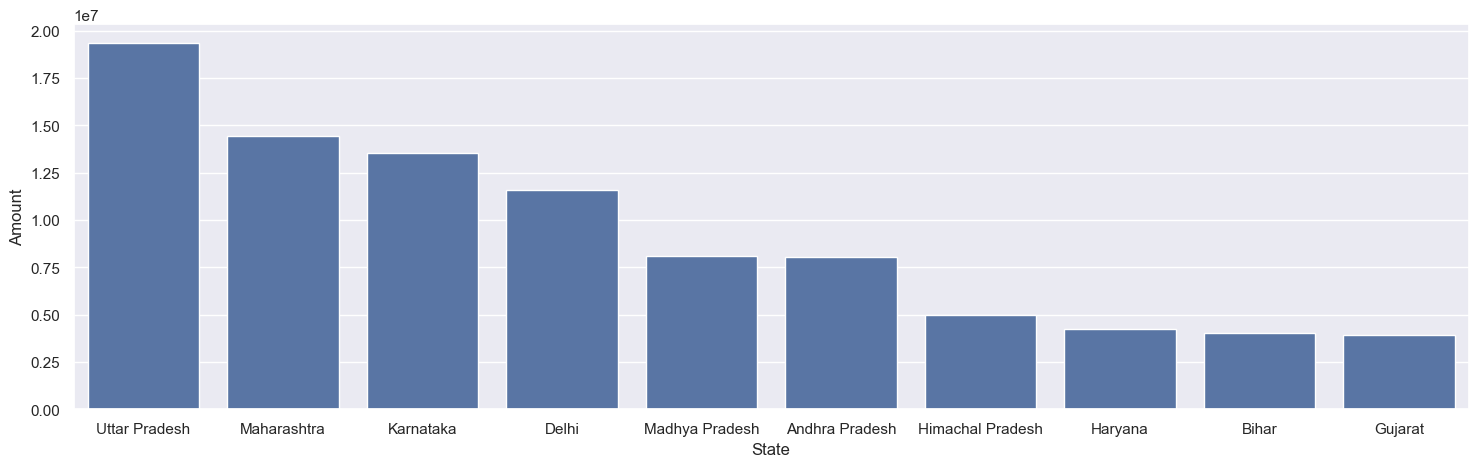

In [20]:
sales_by_state_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (18,5)})
sns.barplot(data=sales_by_state_amount, x='State', y='Amount')

* From above graph we can clearly say that Uttar Pradesh, Maharashtra and Karnataka are the state from where our most of the buyers are coming and those are the states from where highest sales orders coming as well as they have highest purchasing power

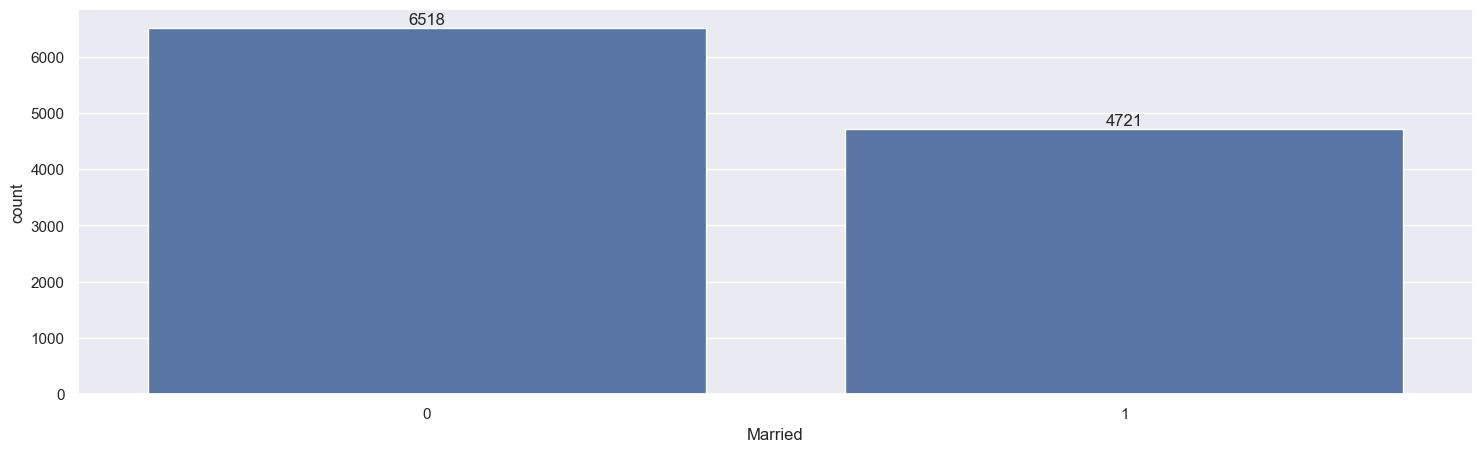

In [21]:
ax = sns.countplot(data=df, x='Married')

sns.set(rc={'figure.figsize': (7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='Amount'>

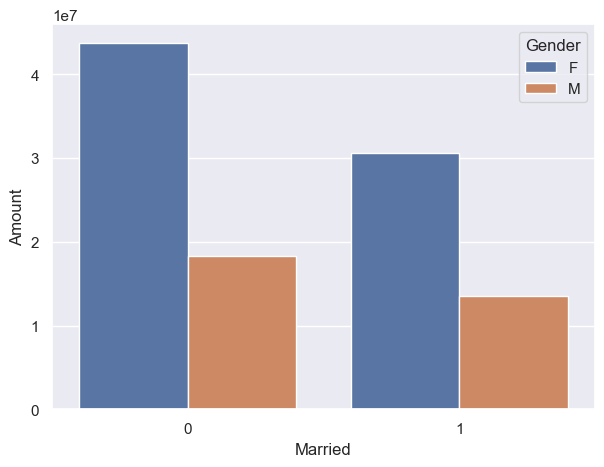

In [22]:
sales_by_married_and_gender = df.groupby(['Married', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (7, 5)})
sns.barplot(data=sales_by_married_and_gender, x='Married', y='Amount', hue='Gender')

* Above graph says that most of buyers are married woman and they have high purchasing power compare to unmarried woman

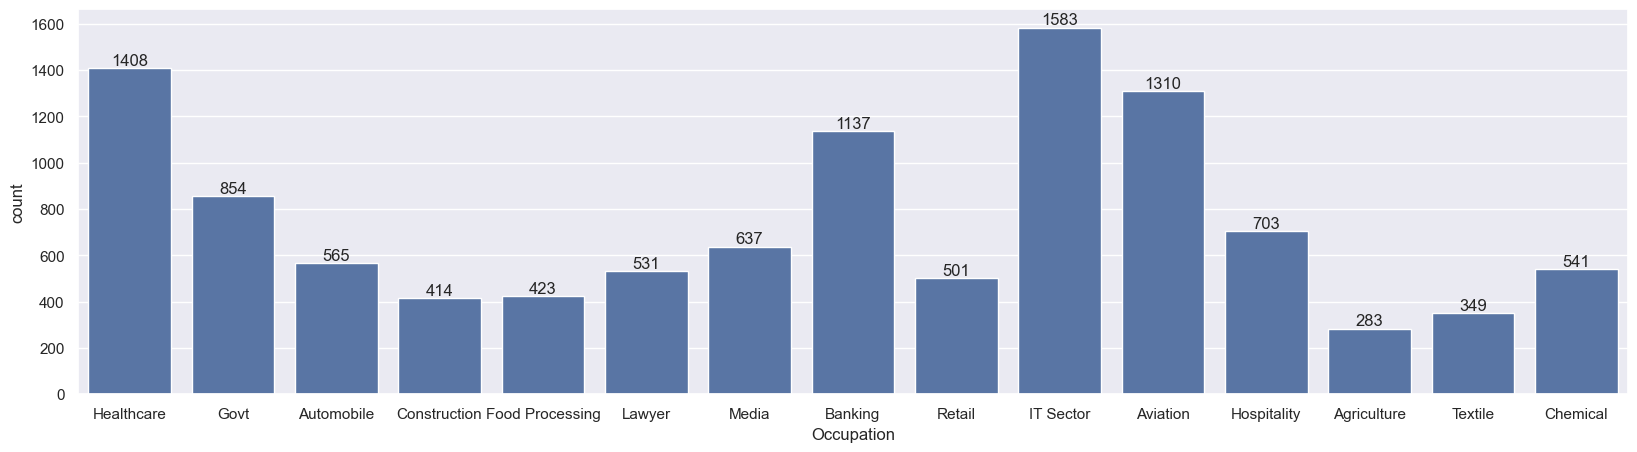

In [23]:
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

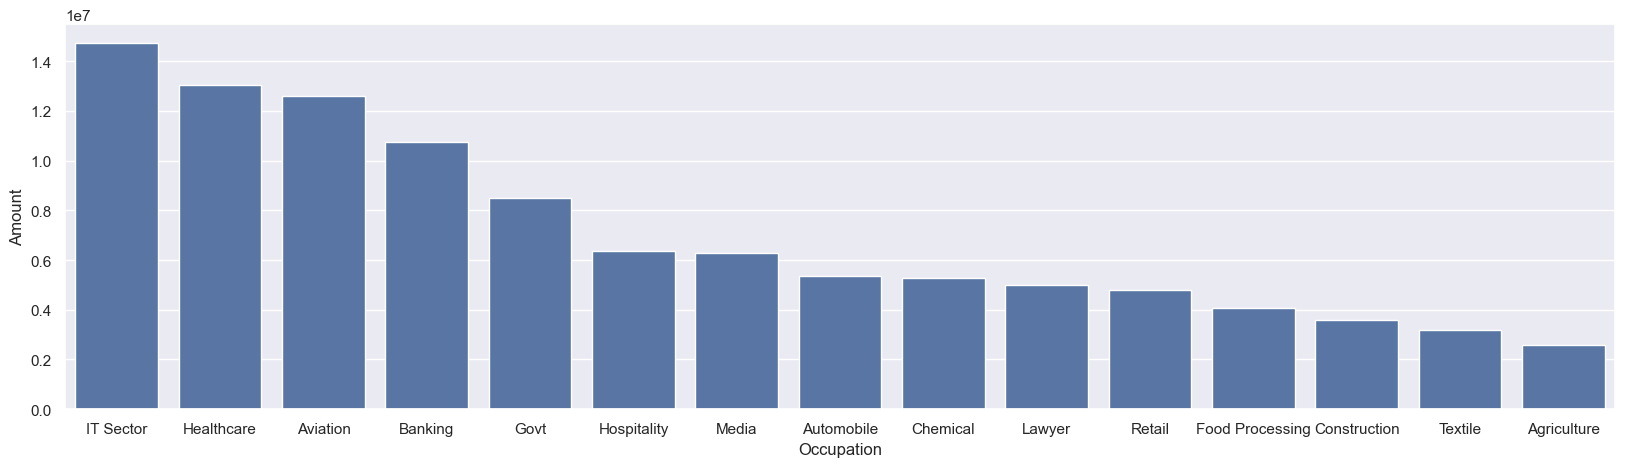

In [24]:
sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(data=sales_by_occupation, x='Occupation', y='Amount')

* From above graphs we can see most of the buyers are working in IT, Healthcare and Aviation sector

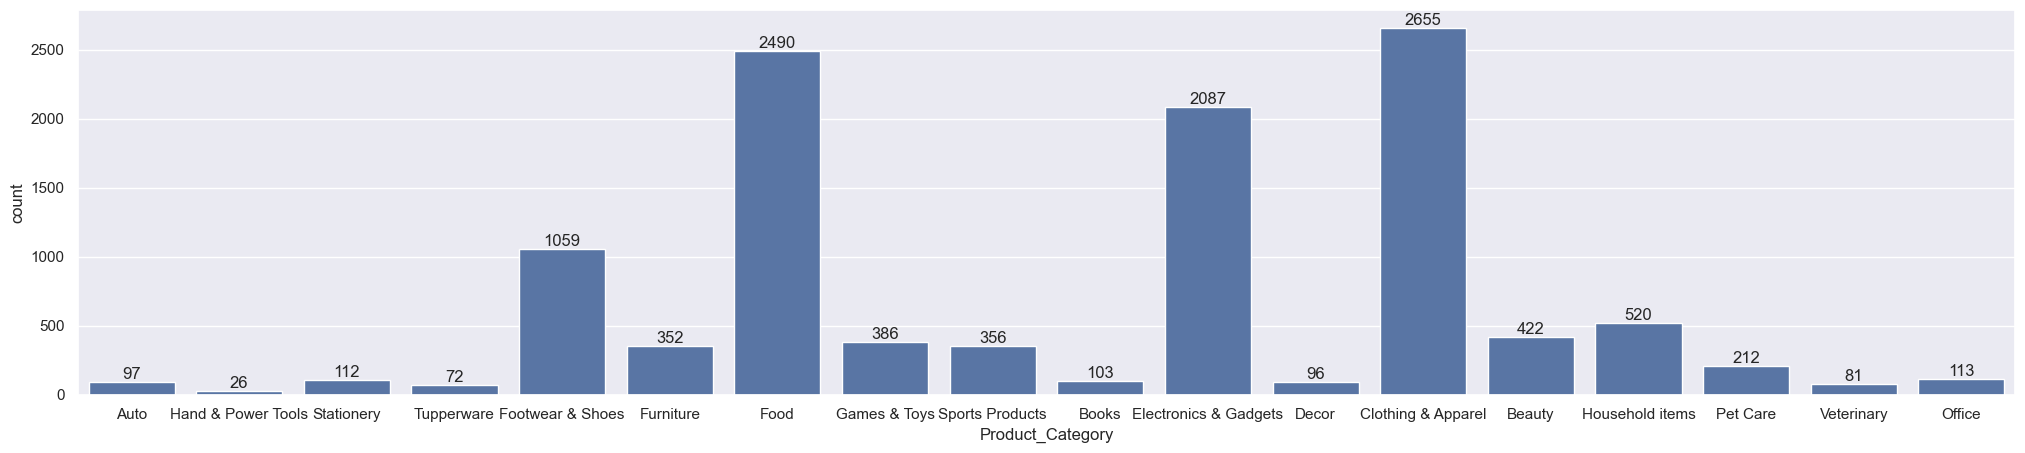

In [25]:
sns.set(rc={'figure.figsize': (25,5)})
ax = sns.countplot(data=df, x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

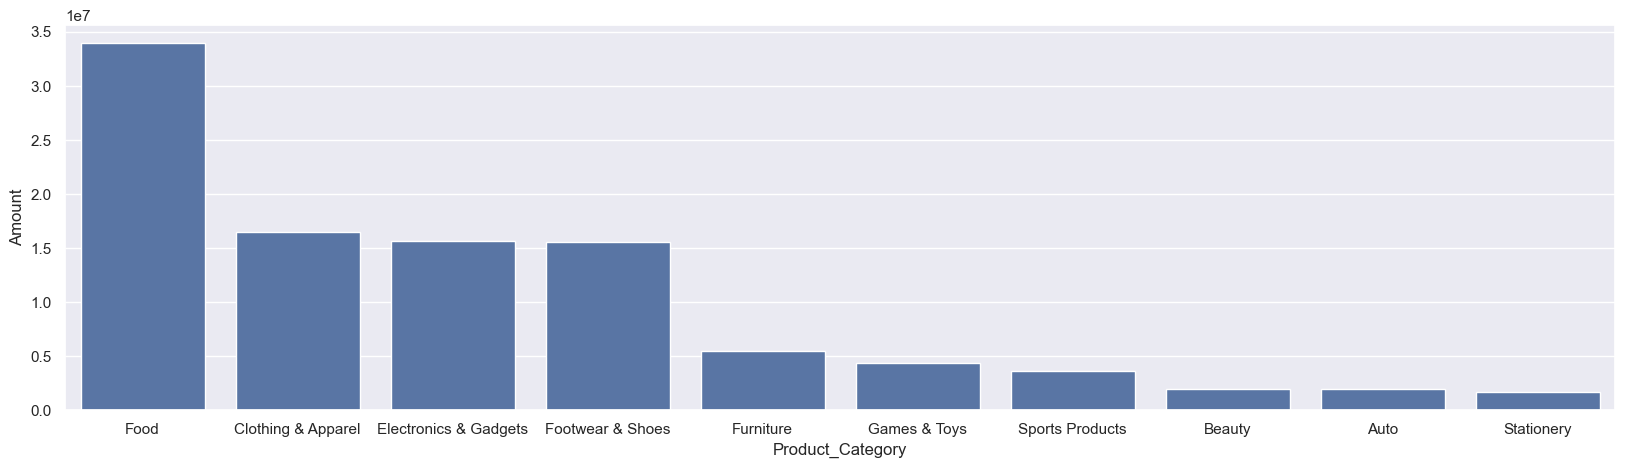

In [26]:
sales_by_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data=sales_by_product, x='Product_Category', y='Amount')

* From above graph we can see that Food, Clothing, Eletronics & Gadets and Footwear are popular category. Highest orders are coming from Clothing & Apparel but highest sales revenue coming from Food category

Conclusion:

Married woman age between 26 to 35 from Maharashtra, Uttar Pradesh, and Karnataka working in IT, Health and Aviation sector are more likely to buy products from Food, Clothing, Electronics & Gadets and Footwear.

In [27]:
df.to_csv('diwali_sales_data1.csv')